In [1]:

import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# New Section

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:


import os

df =  pd.read_csv("/content/drive/MyDrive/text_classification/bbc-text.csv")

In [4]:
print('Shape: ', df.shape)
print("")
print('Columns: ', df.columns)
print("")
print('Category: ', df.category.unique())

Shape:  (2225, 2)

Columns:  Index(['category', 'text'], dtype='object')

Category:  ['tech' 'business' 'sport' 'entertainment' 'politics']


In [5]:
print('Top Rows: ', df)

Top Rows:             category                                               text
0              tech  tv future in the hands of viewers with home th...
1          business  worldcom boss  left books alone  former worldc...
2             sport  tigers wary of farrell  gamble  leicester say ...
3             sport  yeading face newcastle in fa cup premiership s...
4     entertainment  ocean s twelve raids box office ocean s twelve...
...             ...                                                ...
2220       business  cars pull down us retail figures us retail sal...
2221       politics  kilroy unveils immigration policy ex-chatshow ...
2222  entertainment  rem announce new glasgow concert us band rem h...
2223       politics  how political squabbles snowball it s become c...
2224          sport  souness delight at euro progress boss graeme s...

[2225 rows x 2 columns]


               text
category           
business        510
entertainment   386
politics        417
sport           511
tech            401


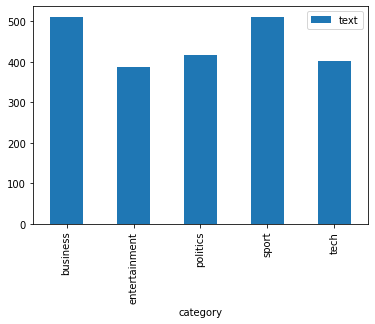

In [6]:
print(df.groupby(['category']).count())
df.groupby(['category']).count().plot.bar()

In [7]:

import re

import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:

def clean_text(web_text):


    text_clean = web_text.lower()

    text_clean = re.sub(r'[^a-z]', ' ', text_clean)

    stop_words = set(nltk.corpus.stopwords.words("english"))
    text_clean = ' '.join([word for word in text_clean.split() if word not in stop_words])

    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized_list = []
    text_words = text_clean.split(" ")
     
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))

    text_clean = " ".join(lemmatized_list)
     
    return text_clean

In [9]:
df['text_clean'] = df['text']
    
n_rows = len(df)

for row in range(0, n_rows):
    
    text = df.loc[row]['text']
    df.loc[row]['text_clean'] = clean_text(text)

In [10]:
print('Before cleaning:')
df['text']

Before cleaning:


0       tv future in the hands of viewers with home th...
1       worldcom boss  left books alone  former worldc...
2       tigers wary of farrell  gamble  leicester say ...
3       yeading face newcastle in fa cup premiership s...
4       ocean s twelve raids box office ocean s twelve...
                              ...                        
2220    cars pull down us retail figures us retail sal...
2221    kilroy unveils immigration policy ex-chatshow ...
2222    rem announce new glasgow concert us band rem h...
2223    how political squabbles snowball it s become c...
2224    souness delight at euro progress boss graeme s...
Name: text, Length: 2225, dtype: object

In [11]:
print('After cleaning:')
df['text_clean']

After cleaning:


0       tv future hand viewers home theatre systems pl...
1       worldcom boss leave book alone former worldcom...
2       tigers wary farrell gamble leicester say rush ...
3       yeading face newcastle fa cup premiership side...
4       ocean twelve raid box office ocean twelve crim...
                              ...                        
2220    cars pull us retail figure us retail sales fel...
2221    kilroy unveil immigration policy ex chatshow h...
2222    rem announce new glasgow concert us band rem a...
2223    political squabble snowball become commonplace...
2224    souness delight euro progress boss graeme soun...
Name: text_clean, Length: 2225, dtype: object

In [12]:
category_codes = {
    'business': 0,
    'entertainment': 1,
    'politics': 2,
    'sport': 3,
    'tech': 4
}

df['category_code'] = df['category']
df = df.replace({'category_code':category_codes})
print('Top Rows: ', df)

Top Rows:             category                                               text  \
0              tech  tv future in the hands of viewers with home th...   
1          business  worldcom boss  left books alone  former worldc...   
2             sport  tigers wary of farrell  gamble  leicester say ...   
3             sport  yeading face newcastle in fa cup premiership s...   
4     entertainment  ocean s twelve raids box office ocean s twelve...   
...             ...                                                ...   
2220       business  cars pull down us retail figures us retail sal...   
2221       politics  kilroy unveils immigration policy ex-chatshow ...   
2222  entertainment  rem announce new glasgow concert us band rem h...   
2223       politics  how political squabbles snowball it s become c...   
2224          sport  souness delight at euro progress boss graeme s...   

                                             text_clean  category_code  
0     tv future hand viewer

In [13]:
# sklearn - library for machine learning
# train_test_split - Split arrays or metrics into random train and test subsets
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df['text_clean'], 
                                                    df['category_code'], 
                                                    test_size=0.15, 
                                                    random_state=8)

In [15]:
# TfidfVectorizer - Convert a collection of raw documents to a matrix of TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)

# Transform documents to a matrix in train
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

# Transform documents to a matrix in test
features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(1891, 300)
(334, 300)


In [17]:
# sklearn - library for machine learning
# SVM - support-vector machines - supervised learning models for classification
from sklearn import svm
# RandomizedSearchCV - randomized search on hyper parameters
from sklearn.model_selection import RandomizedSearchCV
# sklearn.metrics -  for evaluating the quality of a model’s predictions
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# seaborn - library for statistical data visualization
import seaborn as sns

In [18]:
# Default hyperparameters 
svc = svm.SVC(random_state=8)
print(svc.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 8, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [19]:
# Cross Validation
C = [.0001, .001, .01]
gamma = [.0001, .001, .01, .1, 1, 10, 100]
degree = [1, 2, 3, 4, 5]
kernel = ['linear', 'rbf', 'poly']
probability = [True]

random_grid = {'C': C,
              'kernel': kernel,
              'gamma': gamma,
              'degree': degree,
              'probability': probability
             }

print(random_grid)

{'C': [0.0001, 0.001, 0.01], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'degree': [1, 2, 3, 4, 5], 'probability': [True]}


In [20]:
# Definition of the random search
random_search = RandomizedSearchCV(estimator=svc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=SVC(random_state=8), n_iter=50,
                   param_distributions={'C': [0.0001, 0.001, 0.01],
                                        'degree': [1, 2, 3, 4, 5],
                                        'gamma': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100],
                                        'kernel': ['linear', 'rbf', 'poly'],
                                        'probability': [True]},
                   random_state=8, scoring='accuracy', verbose=1)

In [22]:
# Find best hyperparameters from random_grid
best_svc = random_search.best_estimator_

print('Best hyperparameters',random_search.best_params_)
print("")
print('Accuracy', random_search.best_score_)

Best hyperparameters {'probability': True, 'kernel': 'poly', 'gamma': 10, 'degree': 4, 'C': 0.01}

Accuracy 0.9328461583612139


In [23]:
# Fit the best model to the train
best_svc.fit(features_train, labels_train)

# Find the prediction on the test
svc_predict = best_svc.predict(features_test)

print("Accuracy score on train: ", accuracy_score(labels_train, best_svc.predict(features_train)))

Accuracy score on train:  1.0


In [24]:
# Classification report
print("Classification report: ")
print(classification_report(labels_test, svc_predict))

Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        77
           1       0.98      0.95      0.97        63
           2       0.98      0.90      0.94        61
           3       0.96      0.99      0.97        77
           4       0.98      0.96      0.97        56

    accuracy                           0.96       334
   macro avg       0.97      0.96      0.96       334
weighted avg       0.96      0.96      0.96       334



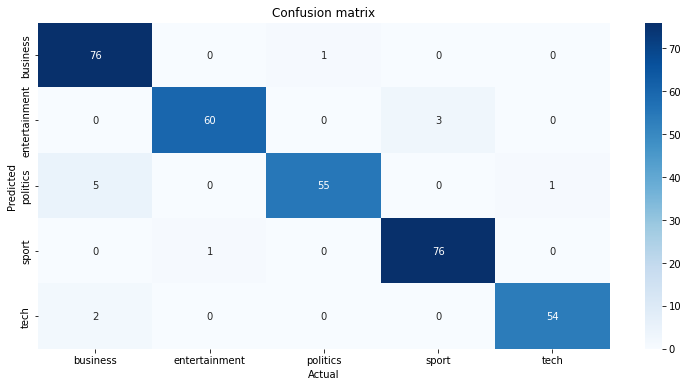

In [25]:
# Confusion matrix - summary of prediction results on a classification problem
aux_df = df[['category', 'category_code']].drop_duplicates().sort_values('category_code')
conf_matrix = confusion_matrix(labels_test, svc_predict)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['category'].values, 
            yticklabels=aux_df['category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [26]:
# Urllib - package for handling URL
from urllib.request import urlopen

# BeautifulSoup - library for pulling data out of HTML and XML files
from bs4 import BeautifulSoup

In [27]:
def get_website_text(url):

    html = urlopen(url).read()

    # get HTML from websites
    soup = BeautifulSoup(html, features="html.parser")

    # remove script and style elements
    for script in soup(["script", "style"]):
        script.extract()    

    # get text
    text = soup.get_text()

    # break into lines and remove leading and trailing space on each
    lines = (line.strip() for line in text.splitlines())

    # break multi-headlines into a line each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))

    # drop blank lines
    text = '\n'.join(chunk for chunk in chunks if chunk)

    return(text)

In [28]:
# list of website for testing 
urls = ["https://techcrunch.com/2022/02/18/coatue-backs-kubercosts-goal-of-supply-data-to-millions-of-kubernetes-developers/",
        "https://www.bbc.com/sport/formula1/60431001",
        "https://www.bbc.com/sport/cricket",
        "https://indianexpress.com/section/india/political-pulse/"]


# categories for each site 'entertainment', 'business'
categorys = ['tech','sport','sport','politics']

# build real data DataFrame
website_df = pd.DataFrame(columns =["url", "text", "category", "category_code" , "predict code"])
website_df['url'] = urls
website_df['category'] = categorys
website_df['category_code'] = website_df['category']
website_df = website_df.replace({'category_code':category_codes})

In [29]:
# pull, clean and fill website text from url
texts = []

for url in urls:
  text = get_website_text(url)
  text = clean_text(text)
  texts.append(text)
    #text = get_website_text(url)
    
    
    
website_df['text'] = texts  

In [30]:
features_real_data = tfidf.transform(website_df['text']).toarray()
labels_real_data = website_df['category_code']
svc_predict_real_data = best_svc.predict(features_real_data)

website_df['predict code'] = svc_predict_real_data

print(website_df[['url', 'category_code', 'predict code']])

                                                 url  category_code  \
0  https://techcrunch.com/2022/02/18/coatue-backs...              4   
1        https://www.bbc.com/sport/formula1/60431001              3   
2                  https://www.bbc.com/sport/cricket              3   
3  https://indianexpress.com/section/india/politi...              2   

   predict code  
0             0  
1             3  
2             3  
3             2  


In [31]:
# Classification report
print("Classification report: ")
print(classification_report(labels_real_data, svc_predict_real_data))

Classification report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.75      0.75      0.75         4



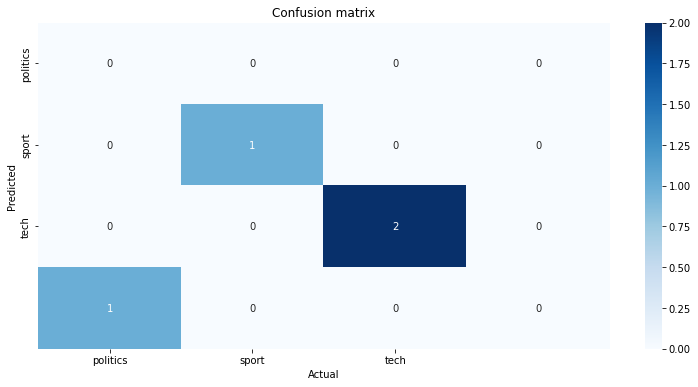

In [32]:

# Confusion matrix - summary of prediction results on a classification problem
aux_df = website_df[['category', 'category_code']].drop_duplicates().sort_values('category_code')
conf_matrix = confusion_matrix(labels_real_data, svc_predict_real_data)
#conf_matrix = confusion_matrix(labels_real_data, svc_predict_real_data)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['category'].values, 
            yticklabels=aux_df['category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [33]:
# list of website for testing 
urls = ["https://techcrunch.com/2022/02/18/coatue-backs-kubercosts-goal-of-supply-data-to-millions-of-kubernetes-developers/",
        "https://www.bbc.com/sport/formula1/60431001", 
        
        "https://edition.cnn.com/world/live-news/beijing-winter-olympics-02-18-22-spt/index.html", 
        "https://edition.cnn.com/2022/02/18/politics/donald-trump-courts/index.html", 
        "https://www.bbc.com/news/entertainment-arts-60138866", 
        "https://www.cnbc.com/2022/02/19/us-listed-chinese-companies-need-beijings-approval-for-secondary-listings.html",
        "https://www.cnbc.com/2022/02/16/google-plans-android-privacy-change-similar-to-apples.html"]

# categories for each site
categorys = ['tech','sport', 'sport', 'politics', 'entertainment', 'business', 'tech']

# build real data DataFrame
website_df = pd.DataFrame(columns =["url", "text", "category", "category_code" , "predict code"])
website_df['url'] = urls
website_df['category'] = categorys
website_df['category_code'] = website_df['category']
website_df = website_df.replace({'category_code':category_codes})

In [34]:
# pull, clean and fill website text from url
texts = []

for url in urls:
    text = get_website_text(url)
    text = clean_text(text)
    texts.append(text)
    
website_df['text'] = texts    

In [35]:
features_real_data = tfidf.transform(website_df['text']).toarray()
labels_real_data = website_df['category_code']
svc_predict_real_data = best_svc.predict(features_real_data)

website_df['predict code'] = svc_predict_real_data

print(website_df[['url', 'category_code', 'predict code']])

                                                 url  category_code  \
0  https://techcrunch.com/2022/02/18/coatue-backs...              4   
1        https://www.bbc.com/sport/formula1/60431001              3   
2  https://edition.cnn.com/world/live-news/beijin...              3   
3  https://edition.cnn.com/2022/02/18/politics/do...              2   
4  https://www.bbc.com/news/entertainment-arts-60...              1   
5  https://www.cnbc.com/2022/02/19/us-listed-chin...              0   
6  https://www.cnbc.com/2022/02/16/google-plans-a...              4   

   predict code  
0             0  
1             3  
2             3  
3             4  
4             1  
5             0  
6             4  


In [36]:
# Classification report
print("Classification report: ")
print(classification_report(labels_real_data, svc_predict_real_data))

Classification report: 
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         2
           4       0.50      0.50      0.50         2

    accuracy                           0.71         7
   macro avg       0.60      0.70      0.63         7
weighted avg       0.64      0.71      0.67         7



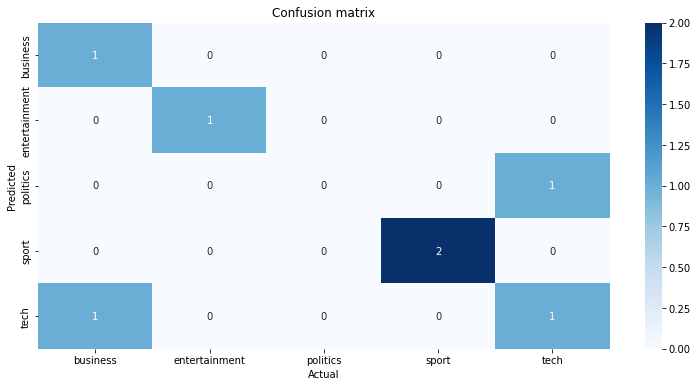

In [37]:
# Confusion matrix - summary of prediction results on a classification problem
aux_df = website_df[['category', 'category_code']].drop_duplicates().sort_values('category_code')
conf_matrix = confusion_matrix(labels_real_data, svc_predict_real_data)
#conf_matrix = confusion_matrix(labels_real_data, svc_predict_real_data)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['category'].values, 
            yticklabels=aux_df['category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()